In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
import pandas as pd


file_path = r'D:\IIT T dataset\final_merged_dataset.csv'  # Using raw string

df = pd.read_csv(file_path)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28529 entries, 0 to 28528
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       28529 non-null  object 
 1   time       28529 non-null  object 
 2   TEC        28513 non-null  float64
 3   lat        28529 non-null  float64
 4   lon        28529 non-null  float64
 5   alt        28529 non-null  float64
 6   az         28529 non-null  float64
 7   el         28529 non-null  float64
 8   S4         28529 non-null  float64
 9   ROTI       28512 non-null  float64
 10  PRN        28529 non-null  float64
 11  Kp         28529 non-null  float64
 12  ap         28529 non-null  int64  
 13  Ap         28529 non-null  int64  
 14  SN         28529 non-null  int64  
 15  F10_7_obs  28529 non-null  float64
dtypes: float64(11), int64(3), object(2)
memory usage: 3.5+ MB


In [8]:
df.isna().sum()

date          0
time          0
TEC          16
lat           0
lon           0
alt           0
az            0
el            0
S4            0
ROTI         17
PRN           0
Kp            0
ap            0
Ap            0
SN            0
F10_7_obs     0
dtype: int64

In [13]:
nan_rows = df[df.isna().any(axis=1)].index.tolist()
print("Rows with NaN:", nan_rows)
t=0
for i in nan_rows:
    t+=1
print("number of rows with NaN:",t)



Rows with NaN: [2011, 2229, 2233, 2235, 2255, 2274, 3776, 3779, 3780, 3789, 3790, 12451, 13643, 13654, 13658, 13660, 13664, 13991, 13995, 14056, 14476, 14508, 14947, 14976, 14979, 15029, 15030, 15036, 15172, 15208, 15213, 15214, 15228]
number of rows with NaN: 33


In [ ]:
# Print rows with NaN in any column
nan_rows = df[df.isna().any(axis=1)]
print("Rows with NaN values:\n", nan_rows)

Rows with NaN values:
              date   time    TEC        lat       lon         alt          az  \
2011   02-03-2018  09:37   5.83  38.779360 -9.139727  134.931610  183.050000   
2229   02-03-2018  13:17   8.38  38.779353 -9.139719  128.313273  182.225000   
2233   02-03-2018  13:22   9.32  38.779352 -9.139716  133.777512  182.587500   
2235   02-03-2018  13:25   9.18  38.779359 -9.139717  131.108439  182.787500   
2255   02-03-2018  13:46   9.50  38.779335 -9.139709  131.379870  188.088889   
2274   02-03-2018  14:05   9.46  38.779343 -9.139716  131.725684  149.766667   
3776   03-03-2018  15:09   9.28  38.779159 -9.140211  112.626710  138.725000   
3779   03-03-2018  15:18  14.72  38.779301 -9.139717  133.737762  182.100000   
3780   03-03-2018  15:19  16.89  38.779356 -9.139685  127.868667  185.557143   
3789   03-03-2018  15:30  11.03  38.779330 -9.139713  129.389933  181.688889   
3790   03-03-2018  15:31  11.03  38.779334 -9.139724  127.720220  181.777778   
12451  09-03-2018

In [ ]:
# Extract temporal components
df['hour'] = pd.to_datetime(df['date'] + ' ' + df['time']).dt.hour
df['day_of_year'] = pd.to_datetime(df['date'] + ' ' + df['time']).dt.dayofyear
df['month'] = pd.to_datetime(df['date'] + ' ' + df['time']).dt.month

In [14]:
df_copy=df.copy()

In [16]:

# Remove redundant features
features_to_drop = ['ap', 'Ap', 'SN']
df_clean = df.drop(columns=features_to_drop)

In [17]:
nan_rows = df[df.isna().any(axis=1)].index.tolist()
print("Rows with NaN:", nan_rows)
t=0
for i in nan_rows:
    t+=1
print("number of rows with NaN:",t)



Rows with NaN: [2011, 2229, 2233, 2235, 2255, 2274, 3776, 3779, 3780, 3789, 3790, 12451, 13643, 13654, 13658, 13660, 13664, 13991, 13995, 14056, 14476, 14508, 14947, 14976, 14979, 15029, 15030, 15036, 15172, 15208, 15213, 15214, 15228]
number of rows with NaN: 33


In [23]:
# Extract hour directly from time column
df_clean['hour'] = pd.to_datetime(df_clean['time'], format='%H:%M').dt.hour

# Extract day_of_year directly from date column  
df_clean['day_of_year'] = pd.to_datetime(df_clean['date'], format='%d-%m-%Y').dt.dayofyear
df_clean['month'] = pd.to_datetime(df_clean['date'], format='%d-%m-%Y').dt.month

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28529 entries, 0 to 28528
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         28529 non-null  object 
 1   time         28529 non-null  object 
 2   TEC          28513 non-null  float64
 3   lat          28529 non-null  float64
 4   lon          28529 non-null  float64
 5   alt          28529 non-null  float64
 6   az           28529 non-null  float64
 7   el           28529 non-null  float64
 8   S4           28529 non-null  float64
 9   ROTI         28512 non-null  float64
 10  PRN          28529 non-null  float64
 11  Kp           28529 non-null  float64
 12  F10_7_obs    28529 non-null  float64
 13  hour         28529 non-null  int32  
 14  day_of_year  28529 non-null  int32  
 15  month        28529 non-null  int32  
dtypes: float64(11), int32(3), object(2)
memory usage: 3.2+ MB


In [39]:
df_clean['datetime'] = pd.to_datetime(df_clean['date'] + ' ' + df_clean['time'], format='%d-%m-%Y %H:%M')
df_clean['month'] = df_clean['datetime'].dt.month
# Create cyclical features for LSTM
df_clean['hour_sin'] = np.sin(2 * np.pi * df_clean['hour'] / 24)
df_clean['hour_cos'] = np.cos(2 * np.pi * df_clean['hour'] / 24)
df_clean['day_sin'] = np.sin(2 * np.pi * df_clean['day_of_year'] / 365)
df_clean['day_cos'] = np.cos(2 * np.pi * df_clean['day_of_year'] / 365)

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28529 entries, 0 to 28528
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         28529 non-null  object        
 1   time         28529 non-null  object        
 2   TEC          28513 non-null  float64       
 3   lat          28529 non-null  float64       
 4   lon          28529 non-null  float64       
 5   alt          28529 non-null  float64       
 6   az           28529 non-null  float64       
 7   el           28529 non-null  float64       
 8   S4           28529 non-null  float64       
 9   ROTI         28512 non-null  float64       
 10  PRN          28529 non-null  float64       
 11  Kp           28529 non-null  float64       
 12  F10_7_obs    28529 non-null  float64       
 13  hour         28529 non-null  int32         
 14  day_of_year  28529 non-null  int32         
 15  month        28529 non-null  int32         
 16  date

In [41]:
# Create derived features
df_clean['storm_flag'] = (df_clean['Kp'] >= 5.0).astype(int)
df_clean['high_solar'] = (df_clean['F10_7_obs'] >= 150).astype(int)


In [42]:
df_clean[1:5]

,date,time,TEC,lat,lon,alt,az,el,S4,ROTI,...,month,datetime,hour_cos,hour_sin,storm_flag,high_solar,Kp_lag1,F10_7_lag1,day_sin,day_cos
1,01-03-2018,00:01,9.14,38.779323,-9.139702,126.733350,206.025000,36.812500,0.086250,9.847500,...,3,2018-03-01 00:01:00,1.0,0.0,0,0,0.667,67.2,0.858764,0.512371
2,01-03-2018,00:02,9.12,38.779321,-9.139703,127.373833,206.175000,36.837500,0.081250,9.778750,...,3,2018-03-01 00:02:00,1.0,0.0,0,0,0.667,67.2,0.858764,0.512371
3,01-03-2018,00:03,9.12,38.779319,-9.139709,127.070050,195.366667,33.888889,0.098889,9.242222,...,3,2018-03-01 00:03:00,1.0,0.0,0,0,0.667,67.2,0.858764,0.512371
4,01-03-2018,00:04,9.11,38.779324,-9.139710,127.703383,195.500000,33.944444,0.095556,10.596667,...,3,2018-03-01 00:04:00,1.0,0.0,0,0,0.667,67.2,0.858764,0.512371


In [43]:
# Lagged features for temporal dependencies
df_clean['Kp_lag1'] = df_clean['Kp'].shift(1)
df_clean['F10_7_lag1'] = df_clean['F10_7_obs'].shift(1)


In [44]:
lstm_features = [
    # Temporal (cyclical encoding)
    'hour_sin', 'hour_cos', 'day_sin', 'day_cos',
    
    # Spatial
    'lat', 'lon', 'alt',
    
    # Solar/Geomagnetic (current and lagged)
    'F10_7_obs', 'F10_7_lag1', 'Kp', 'Kp_lag1',
    
    # Satellite geometry
    'el', 'az',
    
    # Storm indicators
    'storm_flag', 'high_solar',
    
    # Validation metrics (optional)
    'S4', 'ROTI'
]

target = 'TEC'


In [45]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = df_clean[lstm_features].values
y = df_clean[target].values.reshape(-1, 1)

# Scale data (MinMaxScaler works better with LSTM)
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y)


In [47]:
df_clean_copy = df_clean.copy()

In [48]:
# Save to CSV
output_file = 'copy_preprocessed_data_before dropping.csv'
df_clean.to_csv(output_file, index=False)

In [50]:
# Check where NaN values occur
print("NaN summary by column:")
print(df_clean.isnull().sum())

# Check temporal distribution of NaN values
nan_rows = df_clean[df_clean.isnull().any(axis=1)]
print(f"NaN rows: {len(nan_rows)} out of {len(df_clean)}")
print("Time distribution of NaN values:")
print(nan_rows['datetime'].dt.date.value_counts().head())


NaN summary by column:
date            0
time            0
TEC            16
lat             0
lon             0
alt             0
az              0
el              0
S4              0
ROTI           17
PRN             0
Kp              0
F10_7_obs       0
hour            0
day_of_year     0
month           0
datetime        0
hour_cos        0
hour_sin        0
storm_flag      0
high_solar      0
Kp_lag1         1
F10_7_lag1      1
day_sin         0
day_cos         0
dtype: int64
NaN rows: 34 out of 28529
Time distribution of NaN values:
datetime
2018-03-22    13
2018-03-02     6
2018-03-03     5
2018-03-10     5
2018-03-21     3
Name: count, dtype: int64


In [52]:
# Set datetime as index before interpolation
df_clean = df_clean.set_index('datetime')

# Now apply the imputation strategy
imputation_strategy = {
    'F10_7_obs': 'linear',      # Solar flux changes slowly
    'Kp': 'linear',             # Geomagnetic index changes gradually  
    'TEC': 'time',              # Strong diurnal patterns - now works!
    'lat': 'ffill',             # Position shouldn't change much
    'lon': 'ffill',             # Position shouldn't change much
    'alt': 'ffill',             # Altitude relatively stable
    'S4': 'linear',             # Scintillation can be interpolated
    'ROTI': 'linear',           # Rate of change can be interpolated
    'PRN': 'ffill'              # Satellite ID - forward fill
}

for col, method in imputation_strategy.items():
    if col in df_clean.columns:
        if method == 'linear':
            df_clean[col] = df_clean[col].interpolate(method='linear')
        elif method == 'time':
            df_clean[col] = df_clean[col].interpolate(method='time')
        elif method == 'ffill':
            df_clean[col] = df_clean[col].fillna(method='ffill')

# Reset index back to integer if needed for later processing
df_clean = df_clean.reset_index()


In [53]:
df_clean.isna().sum()

datetime       0
date           0
time           0
TEC            0
lat            0
lon            0
alt            0
az             0
el             0
S4             0
ROTI           0
PRN            0
Kp             0
F10_7_obs      0
hour           0
day_of_year    0
month          0
hour_cos       0
hour_sin       0
storm_flag     0
high_solar     0
Kp_lag1        1
F10_7_lag1     1
day_sin        0
day_cos        0
dtype: int64

In [54]:
# Drop rows with NaN values (should be only the first row)
print(f"Dataset shape before dropping NaN: {df_clean.shape}")
df_clean = df_clean.dropna()
print(f"Dataset shape after dropping NaN: {df_clean.shape}")
print(f"Rows dropped: {df_clean.shape[0] - (df_clean.shape[0] + 2)}")


Dataset shape before dropping NaN: (28529, 25)
Dataset shape after dropping NaN: (28528, 25)
Rows dropped: -2


In [56]:
df_clean.isna().sum()

datetime       0
date           0
time           0
TEC            0
lat            0
lon            0
alt            0
az             0
el             0
S4             0
ROTI           0
PRN            0
Kp             0
F10_7_obs      0
hour           0
day_of_year    0
month          0
hour_cos       0
hour_sin       0
storm_flag     0
high_solar     0
Kp_lag1        0
F10_7_lag1     0
day_sin        0
day_cos        0
dtype: int64

In [57]:
# Save to CSV
output_file = 'preprocessed_data.csv'
df_clean.to_csv(output_file, index=False)

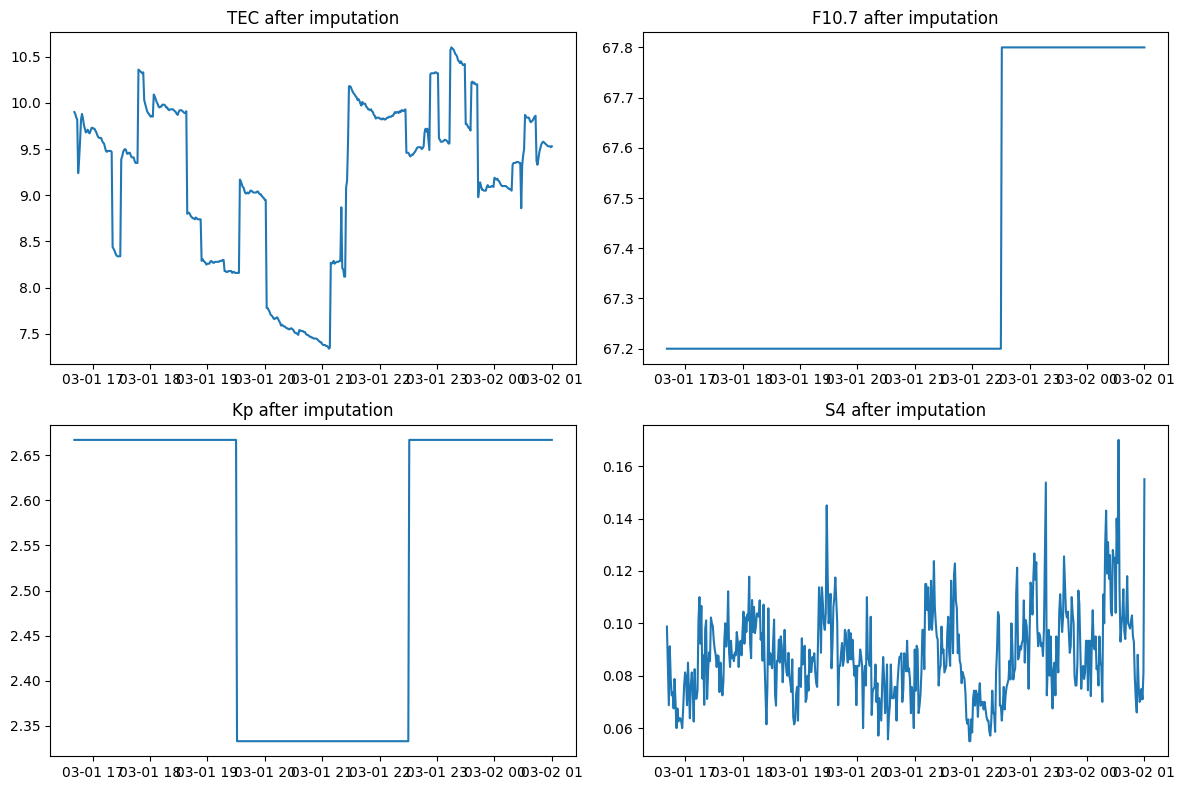

In [59]:
# Plot a sample period to verify continuity
import matplotlib.pyplot as plt

sample_period = df_clean.iloc[1000:1500]  # ~8 hours of data
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0,0].plot(sample_period['datetime'], sample_period['TEC'])
axes[0,0].set_title('TEC after imputation')

axes[0,1].plot(sample_period['datetime'], sample_period['F10_7_obs'])
axes[0,1].set_title('F10.7 after imputation')

axes[1,0].plot(sample_period['datetime'], sample_period['Kp'])
axes[1,0].set_title('Kp after imputation')

axes[1,1].plot(sample_period['datetime'], sample_period['S4'])
axes[1,1].set_title('S4 after imputation')

plt.tight_layout()
plt.show()
